In [217]:
import warnings
warnings.filterwarnings('ignore')

In [218]:
pip install pyecharts

In [219]:
pip install chart_studio

In [220]:
import pyecharts

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator
import seaborn as sns
from datetime import datetime
from matplotlib import font_manager, rc

from pyecharts.charts import Bar
from pyecharts.charts import Line

In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'

-rw------- 1 root root 75337 Nov 15 08:31 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
-rw------- 1 root root 17367 Nov 15 09:47 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'


In [224]:
DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv')
DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv')

In [225]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2662 non-null   object 
 1   coin_name  2662 non-null   object 
 2   num        2662 non-null   int64  
 3   s          2662 non-null   float64
 4   lang       2662 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 104.1+ KB


In [226]:
DF.groupby('coin_name')['coin_name'].count()

coin_name
ada     253
bch     227
btc     298
doge    164
eos      41
eth     346
omg     526
snt     742
xrp      65
Name: coin_name, dtype: int64

In [227]:
DF_bch = DF[DF['coin_name'] == 'bch']

In [228]:
DF_bch

,date,coin_name,num,s,lang
0,2016-05-31,bch,69,0.927536,kor
1152,2021-03-12,bch,21,0.476190,kor
1158,2021-03-13,bch,10,0.700000,kor
1164,2021-03-14,bch,5,1.200000,kor
1169,2021-03-15,bch,22,0.772727,kor
...,...,...,...,...,...
2623,2021-11-08,bch,8,0.875000,kor
2632,2021-11-09,bch,9,0.333333,kor
2639,2021-11-10,bch,10,0.300000,kor
2647,2021-11-11,bch,10,0.300000,kor


In [229]:
DF_bch = DF_bch.reset_index(drop=True)

In [230]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      246 non-null    object
 1   Price     246 non-null    object
 2   Open      246 non-null    object
 3   High      246 non-null    object
 4   Low       246 non-null    object
 5   Vol.      246 non-null    object
 6   Change %  246 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


In [231]:
DF_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 12, 2021",668.20,676.70,684.50,647.00,107.14K,-1.26%
1,"Nov 11, 2021",676.70,663.60,680.70,658.60,93.52K,1.97%
2,"Nov 10, 2021",663.60,717.10,729.10,649.30,290.49K,-7.46%
3,"Nov 09, 2021",717.10,638.50,731.00,636.50,337.53K,12.31%
4,"Nov 08, 2021",638.50,600.30,642.10,598.90,131.61K,6.36%


In [232]:
DF_price['Price'][178]

'1,090.47'

In [233]:
DF_price['Price'][178] = DF_price['Price'][178].replace(',','')

In [234]:
DF_price['Price'][178]

'1090.47'

In [235]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = DF_price['Price'][i].replace(',','')



In [236]:
DF_price['Price'][178]

'1090.47'

In [237]:
DF_price['Price'][178] = pd.to_numeric(DF_price['Price'][178], downcast = 'float')

In [238]:
type(DF_price['Price'][179])

str

In [239]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = pd.to_numeric(DF_price['Price'][i], downcast = 'float')

In [240]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      246 non-null    object
 1   Price     246 non-null    object
 2   Open      246 non-null    object
 3   High      246 non-null    object
 4   Low       246 non-null    object
 5   Vol.      246 non-null    object
 6   Change %  246 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


In [241]:
date_time_obj = datetime.strptime(DF_price['Date'][0], '%b %d, %Y')
date_time_obj

datetime.datetime(2021, 11, 12, 0, 0)

In [242]:
date_time_obj.strftime("%Y-%m-%d")

'2021-11-12'

In [243]:
DF_price.iloc[0]

Date        Nov 12, 2021
Price              668.2
Open              676.70
High              684.50
Low               647.00
Vol.             107.14K
Change %          -1.26%
Name: 0, dtype: object

In [244]:
A = []
for i in range(246):
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  A.append(a)

In [245]:
B = []
for i in range(246):
  x = DF_price['Price'][i]
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  Y = [a,x]
  B.append(Y)
DF_B = pd.DataFrame(B)
DF_B.columns = ['date','price']

In [246]:
# for i in DF_B['date']:
#   for j in DF_bch['date']:
#     if i == j:
#       print('매치', i, j)


In [247]:
C = []
for i in range(len(DF_B)):
  for j in range(len(DF_bch)):
    if DF_B['date'][i] == DF_bch['date'][j]:
      # print('매치', i, j , DF_B['date'][i], DF_bch['date'][j], DF_B['price'][i], DF_bch['s'][j])
      a = DF_B['date'][i]
      b = DF_B['price'][i]
      c = DF_bch['s'][j]
      d = DF_bch['num'][j]
      Y = [a,b,c,d]
      C.append(Y)
DF_bch_F = pd.DataFrame(C)
DF_bch_F.columns = ['date','price','s','num']

In [248]:
DF_bch_F

,date,price,s,num
0,2021-11-12,668.200012,0.666667,9
1,2021-11-11,676.700012,0.300000,10
2,2021-11-10,663.599976,0.300000,10
3,2021-11-09,717.099976,0.333333,9
4,2021-11-08,638.500000,0.875000,8
...,...,...,...,...
221,2021-03-16,528.669983,0.857143,14
222,2021-03-15,523.150024,0.772727,22
223,2021-03-14,553.609985,1.200000,5
224,2021-03-13,593.489990,0.700000,10


In [249]:
# DF_bch_F.sort_values(by = 'date', axis = 0,ascending=True)
# # DF_bch_F = DF_bch_F.reset_index(drop=True)

In [250]:
# DF_bch_F = DF_bch_F.reset_index( inplace=True)

In [251]:
DF_bch_F

,date,price,s,num
0,2021-11-12,668.200012,0.666667,9
1,2021-11-11,676.700012,0.300000,10
2,2021-11-10,663.599976,0.300000,10
3,2021-11-09,717.099976,0.333333,9
4,2021-11-08,638.500000,0.875000,8
...,...,...,...,...
221,2021-03-16,528.669983,0.857143,14
222,2021-03-15,523.150024,0.772727,22
223,2021-03-14,553.609985,1.200000,5
224,2021-03-13,593.489990,0.700000,10


In [252]:
DF_bch_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    226 non-null    object 
 1   price   226 non-null    float64
 2   s       226 non-null    float64
 3   num     226 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ KB


In [253]:
y_values = DF_bch_F['s']

In [254]:
z_values = DF_bch_F['price']

In [255]:
x_values = DF_bch_F['date']	

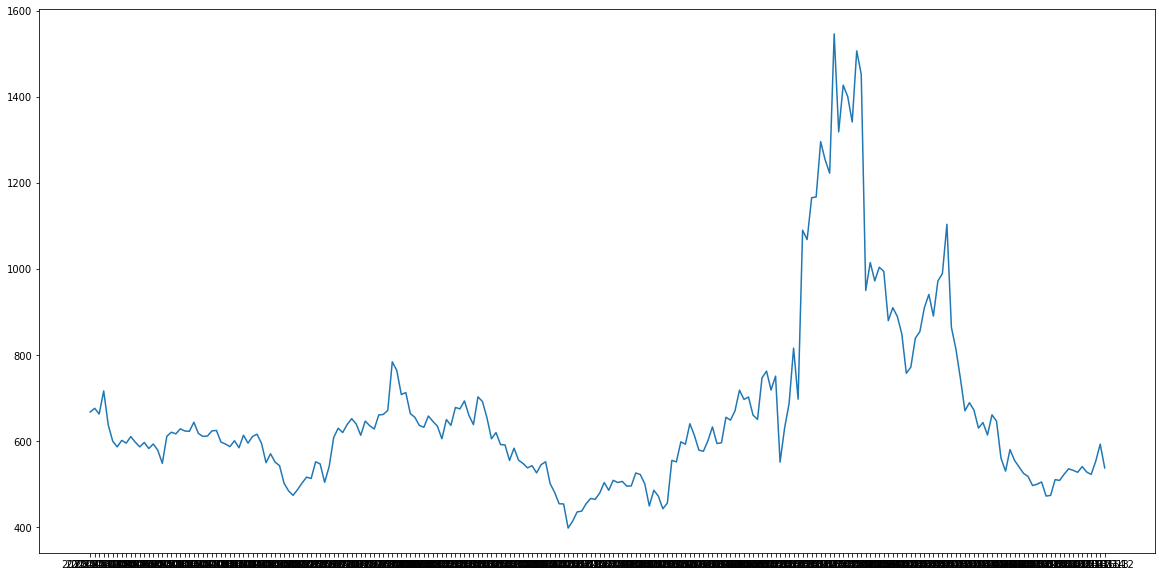

In [256]:
plt.plot(x_values,z_values)
plt.show()

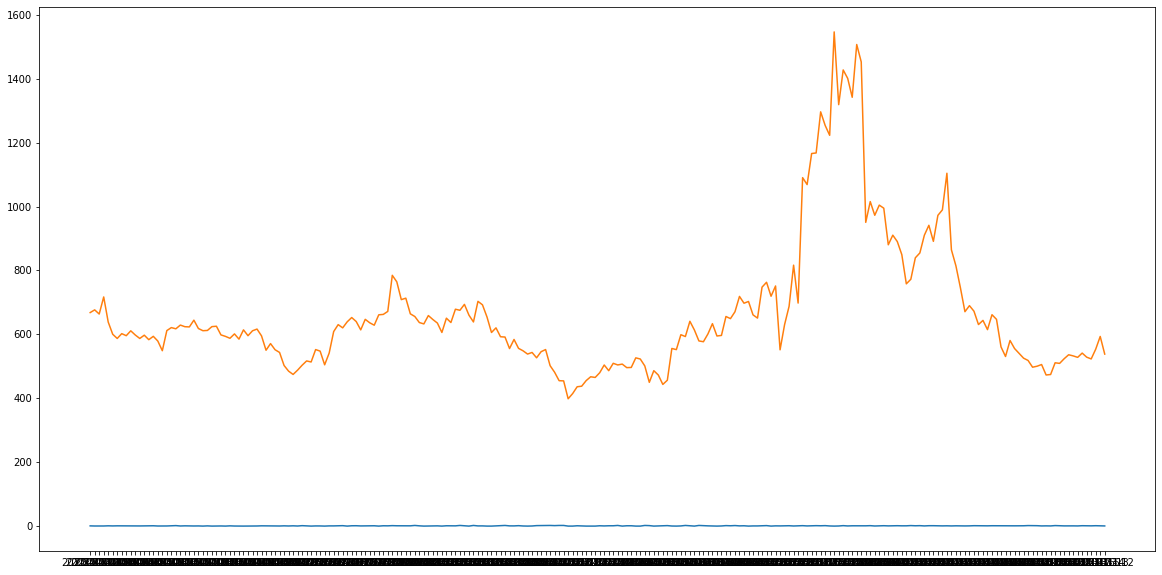

In [257]:
plt.figure(figsize=(20,10))

x_values = DF_bch_F['date']	
y_values = DF_bch_F['s']
z_values = DF_bch_F['price']
plt.plot(x_values, y_values)	
plt.plot(x_values, z_values)

plt.show()

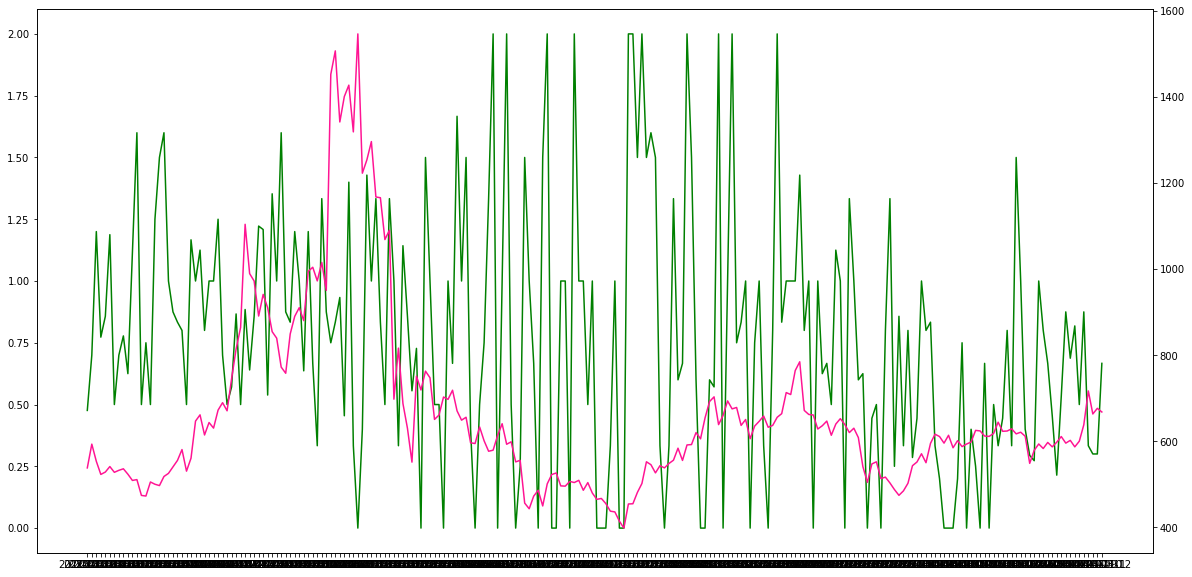

In [258]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax1.plot(x_values, y_values , color = 'green')

ax2 = ax1.twinx()
ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.show()

In [259]:
DF_bch_Fx2 = DF_bch_F[DF_bch_F['num'] >= 20]

In [260]:
DF_bch_Fx2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 186 to 225
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    9 non-null      object 
 1   price   9 non-null      float64
 2   s       9 non-null      float64
 3   num     9 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 360.0+ bytes


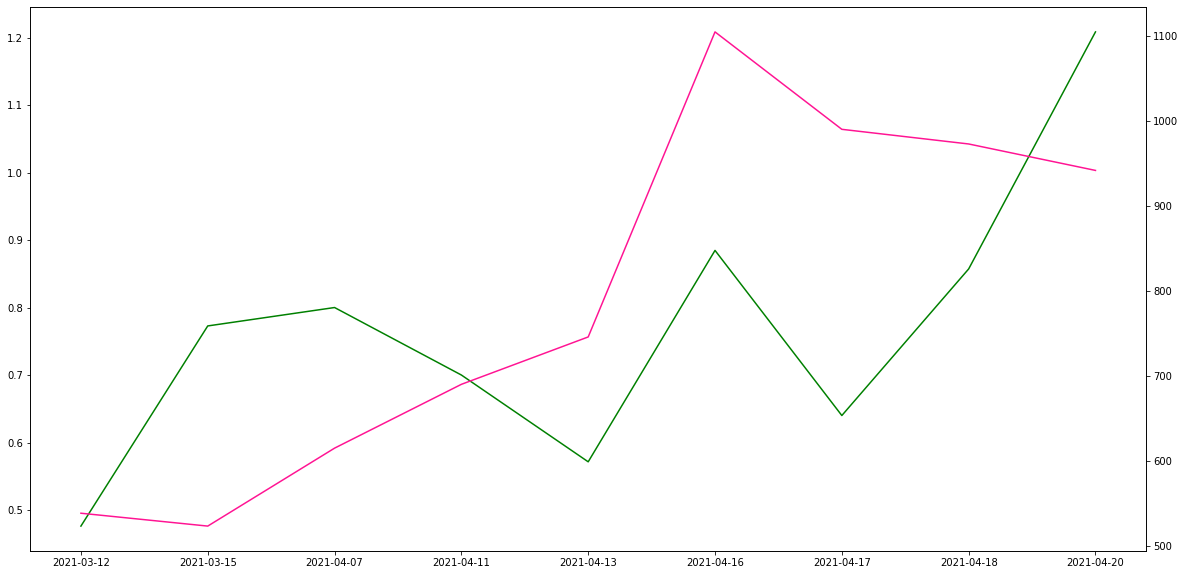

In [262]:
x_values = DF_bch_Fx2['date']	
y_values = DF_bch_Fx2['s']
z_values = DF_bch_Fx2['price']

plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax1.plot(x_values, y_values , color = 'green')

ax2 = ax1.twinx()
ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.show()